<a href="https://colab.research.google.com/github/labviros/computer-vision-topics/blob/master/lesson04-3d_object_model/read_stl3dModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Code to read and plot a 3D STL model

Before using the example code, you will need to install ```numpy-stl``` as shown below. Just "play"  once the code and it should be suficient. After installing for the first time you probably won't need to do it again, unless something goes wrong.

In [1]:
# !pip install numpy-stl

Now the code to really read and plot a 3D STL model in python.

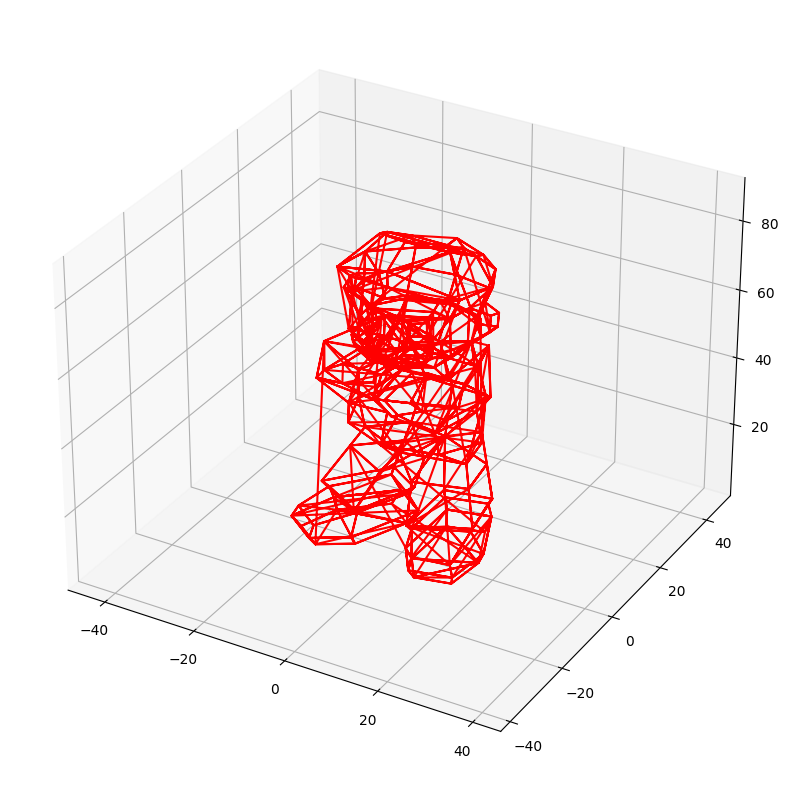

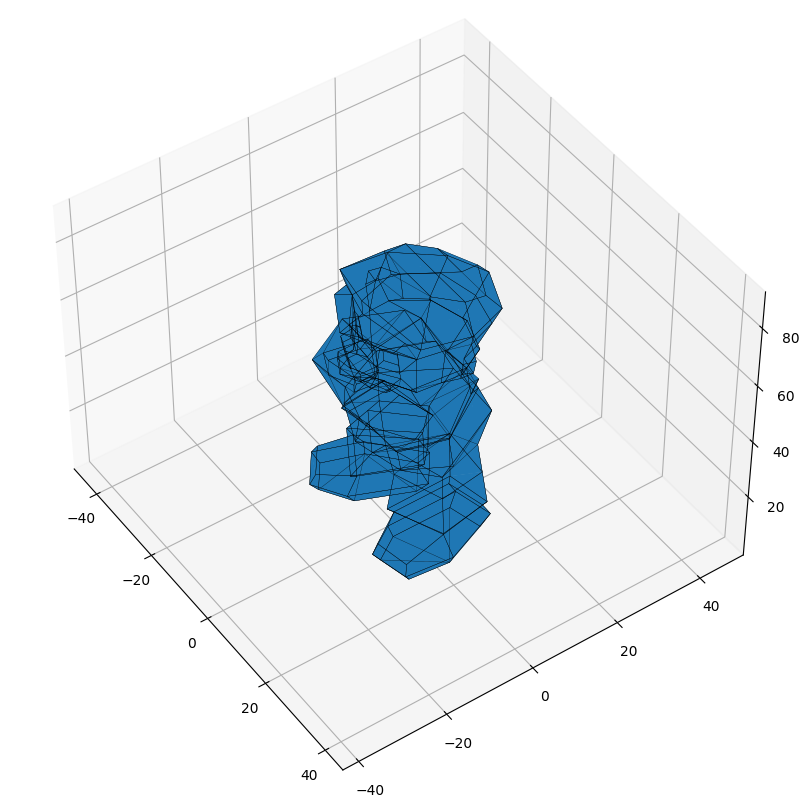

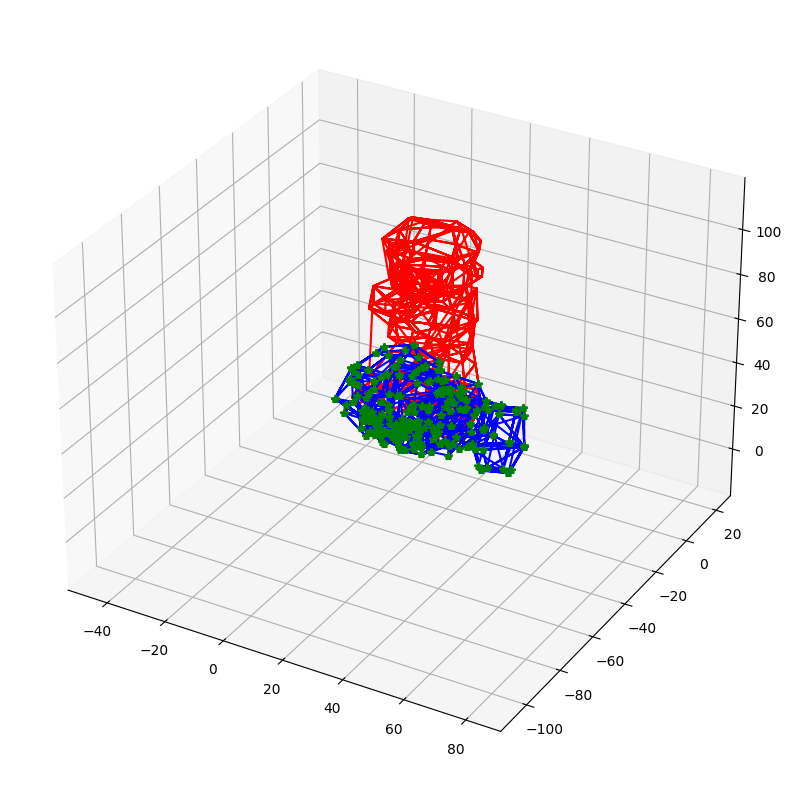

In [11]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
from math import pi,cos,sin

# Complementary function to make the 3D axes aspect equal

def set_axes_equal(ax: plt.Axes):
	#Make axes of 3D plot have equal scale so that spheres appear as spheres,
	#cubes as cubes, etc..  This is one possible solution to Matplotlib's
	#ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

	#Input
	#  ax: a matplotlib axis, e.g., as output from plt.gca().

	x_limits = ax.get_xlim3d()
	y_limits = ax.get_ylim3d()
	z_limits = ax.get_zlim3d()

	x_range = abs(x_limits[1] - x_limits[0])
	x_middle = np.mean(x_limits)
	y_range = abs(y_limits[1] - y_limits[0])
	y_middle = np.mean(y_limits)
	z_range = abs(z_limits[1] - z_limits[0])
	z_middle = np.mean(z_limits)

	# The plot bounding box is a sphere in the sense of the infinity
	# norm, hence I call half the max range the plot radius.
	plot_radius = 0.5*max([x_range, y_range, z_range])

	ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
	ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
	ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def move (dx,dy,dz):
	T = np.eye(4)
	T[0,-1] = dx
	T[1,-1] = dy
	T[2,-1] = dz
	return T

from math import pi,cos,sin

def z_rotation(angle):
	rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
	return rotation_matrix

def x_rotation(angle):
	rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
	return rotation_matrix

def y_rotation(angle):
	rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
	return rotation_matrix

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('mario.STL')

# Get the x, y, z coordinates contained in the mesh structure that are the
# vertices of the triangular faces of the object
x = your_mesh.x.flatten()
y = your_mesh.y.flatten()
z = your_mesh.z.flatten()

# Get the vectors that define the triangular faces that form the 3D object
kong_vectors = your_mesh.vectors

# Create the 3D object from the x,y,z coordinates and add the additional array of ones to
# represent the object using homogeneous coordinates
kong = np.array([x.T,y.T,z.T,np.ones(x.size)])

#print(kong.shape)

###################################################
# Plotting the 3D vertices of the triangular faces
###################################################

# Create a new plot
fig = plt.figure(figsize=[10,10])
axes0 = plt.axes(projection='3d')

# Plot the points drawing the lines
axes0.plot(kong[0,:],kong[1,:],kong[2,:],'r')
set_axes_equal(axes0)

###################################################
# Plotting the 3D triangular faces of the object
###################################################

# Create a new plot
fig = plt.figure(figsize=[10,10])
axes1 = plt.axes(projection='3d')

# Plot and render the faces of the object
axes1.add_collection3d(art3d.Poly3DCollection(kong_vectors))
# Plot the contours of the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(kong_vectors, colors='k', linewidths=0.2, linestyles='-'))
# Plot the vertices of the object
#axes1.plot(kong[0,:],kong[1,:],kong[2,:],'k.')

# Set axes and their aspect
axes1.auto_scale_xyz(kong[0,:],kong[1,:],kong[2,:])
set_axes_equal(axes1)
axes1.view_init(elev=45,azim=-35)

#axes1.dist=10 		# Deprecated on Matplotlib 3.6
#axes1.set_box_aspect(None, zoom = 10)		# New way to do the same as "axes1.dist = 10"

T = move (40,-5,50)
R = x_rotation(pi/4)

M = np.dot(R,T)

kong2 = np.dot(R,np.dot(T,kong))

kong3 = np.dot(M,kong)

# Create a new plot
fig = plt.figure(figsize=[10,10])
axes2 = plt.axes(projection='3d')
# Plot the points drawing the lines
axes2.plot(kong[0,:],kong[1,:],kong[2,:],'r')
axes2.plot(kong2[0,:],kong2[1,:],kong2[2,:],'b')
axes2.plot(kong3[0,:],kong3[1,:],kong3[2,:],'g*')
set_axes_equal(axes2)

# Show the plots
plt.show()



